In [1]:
import numpy as np
import sys, os, git
from matplotlib import pyplot as plt

In [2]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
sys.path.append(git_path+"/docs/inputs/shared-pyplot-files/")
from pyplot_parameters import colors, complete_panel, save_figure, set_boundaries, add_subplotlabels
path_in_folder = current_path[len(git_path)+1:]
level = path_in_folder.split("/")[2][-1]
tutorial_name = path_in_folder.split("/")[3]
path_figures = "/docs/sphinx/source/tutorials/figures/level" + level + "/" + tutorial_name + "/"
print("level:" , level, "& tutorial name:", tutorial_name)
print("figures will be saved in", path_figures)

level: 3 & tutorial name: free-energy-calculation
figures will be saved in /docs/sphinx/source/tutorials/figures/level3/free-energy-calculation/


In [3]:
histograms_k_15 = []
for x0 in np.arange(1, 51):
    file1 = np.loadtxt('data-k0.15/position.'+str(x0)+'.dat')
    #des_pos = file1[0][2]
    pos =  file1.T[1]
    occurence, umx = np.histogram(pos, bins = 50)
    umx = (umx[1:]+umx[:-1])/2
    occurence = np.array(occurence) / np.sum(occurence)
    histograms_k_15.append([umx, occurence])

In [4]:
histograms_k1_5 = []
for x0 in np.arange(1, 51):
    file1 = np.loadtxt('data-k1.5/position.'+str(x0)+'.dat')
    #des_pos = file1[0][2]
    pos =  file1.T[1]
    occurence, umx = np.histogram(pos, bins = 50)
    umx = (umx[1:]+umx[:-1])/2
    occurence = np.array(occurence) / np.sum(occurence)
    histograms_k1_5.append([umx, occurence])

In [5]:
histograms_k15 = []
for x0 in np.arange(1, 51):
    file1 = np.loadtxt('data-k15/position.'+str(x0)+'.dat')
    #des_pos = file1[0][2]
    pos =  file1.T[1]
    occurence, umx = np.histogram(pos, bins = 50)
    umx = (umx[1:]+umx[:-1])/2
    occurence = np.array(occurence) / np.sum(occurence)
    histograms_k15.append([umx, occurence])

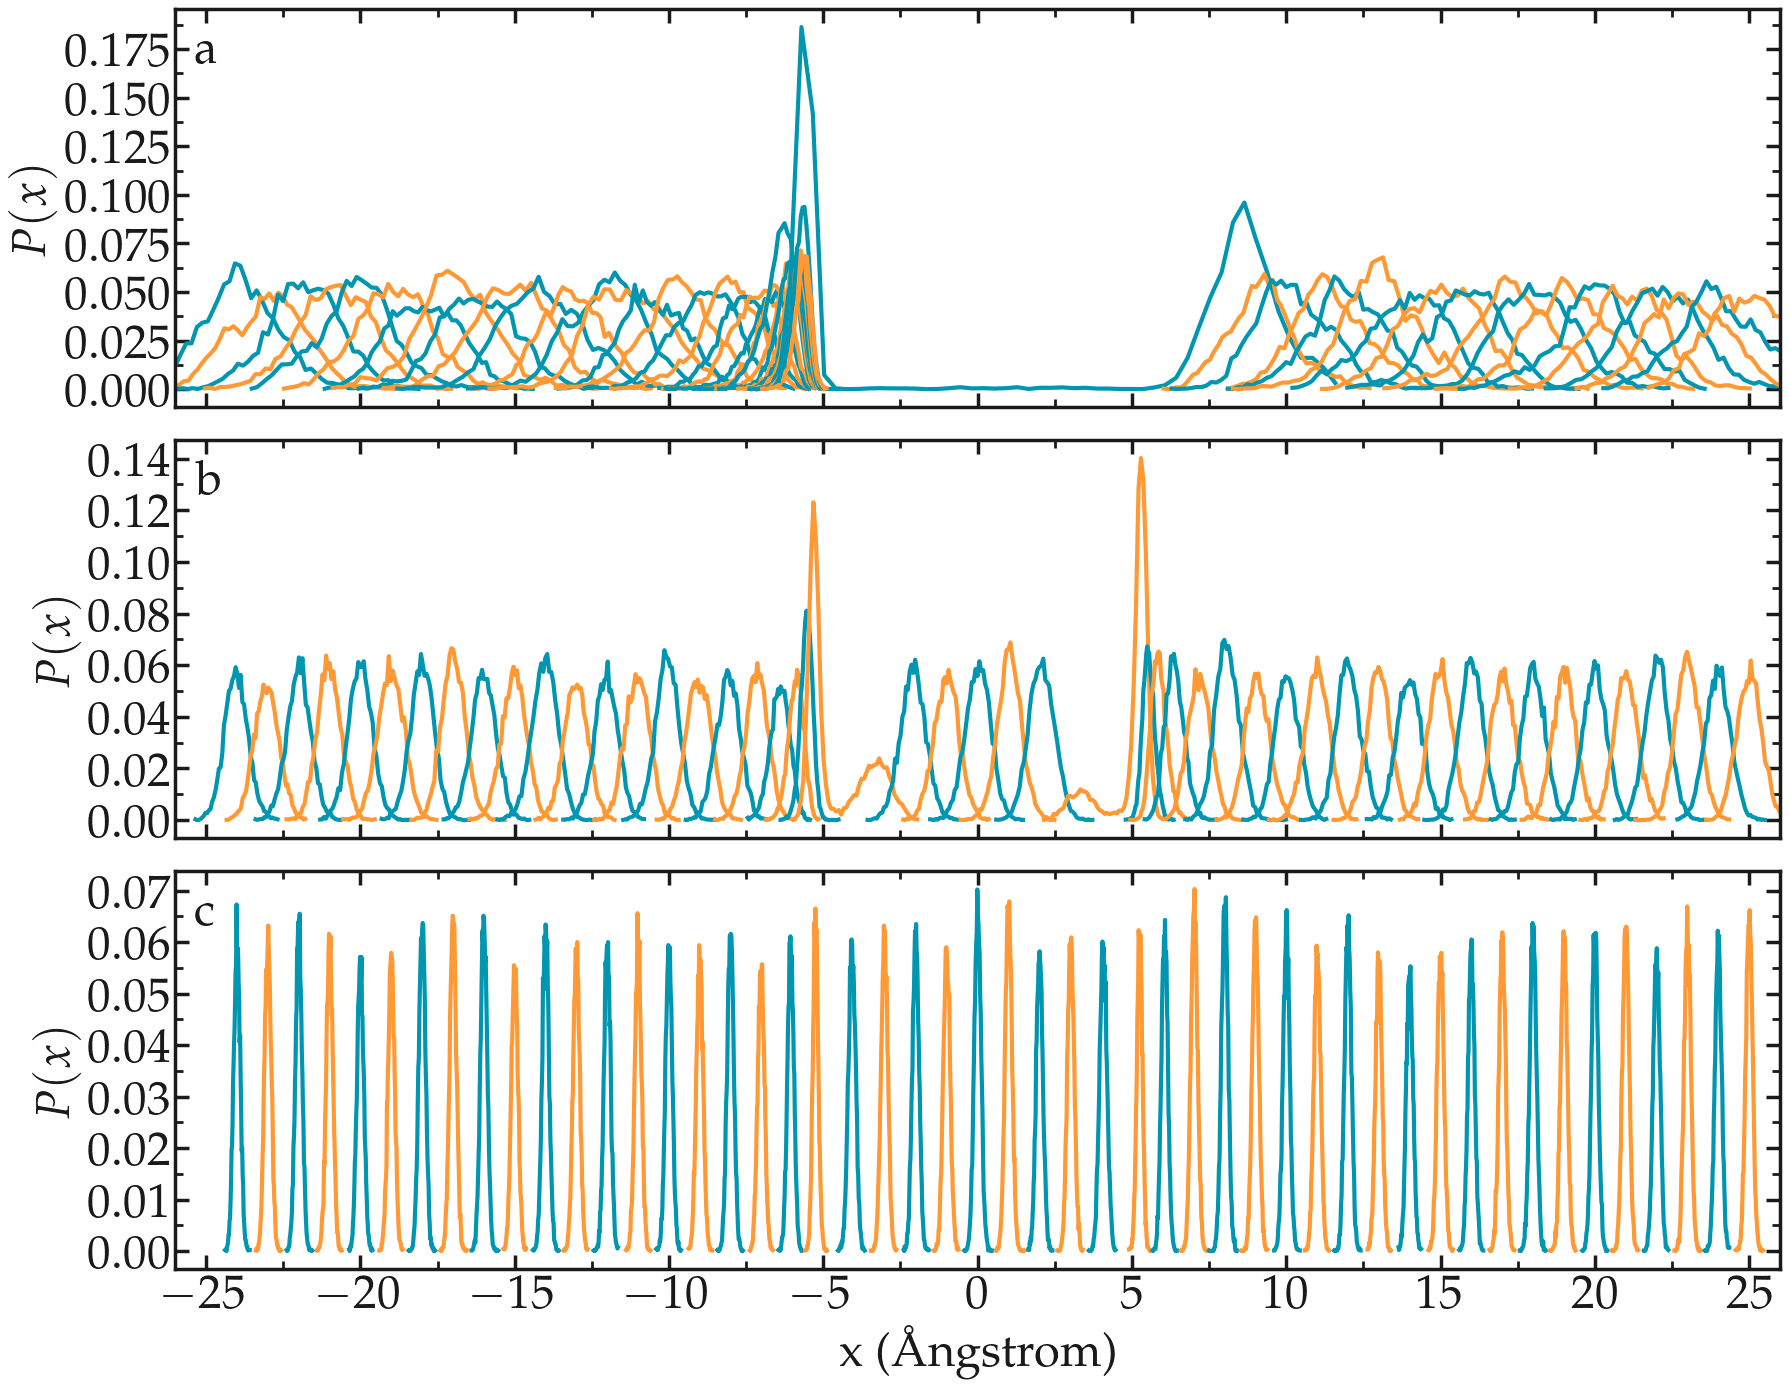

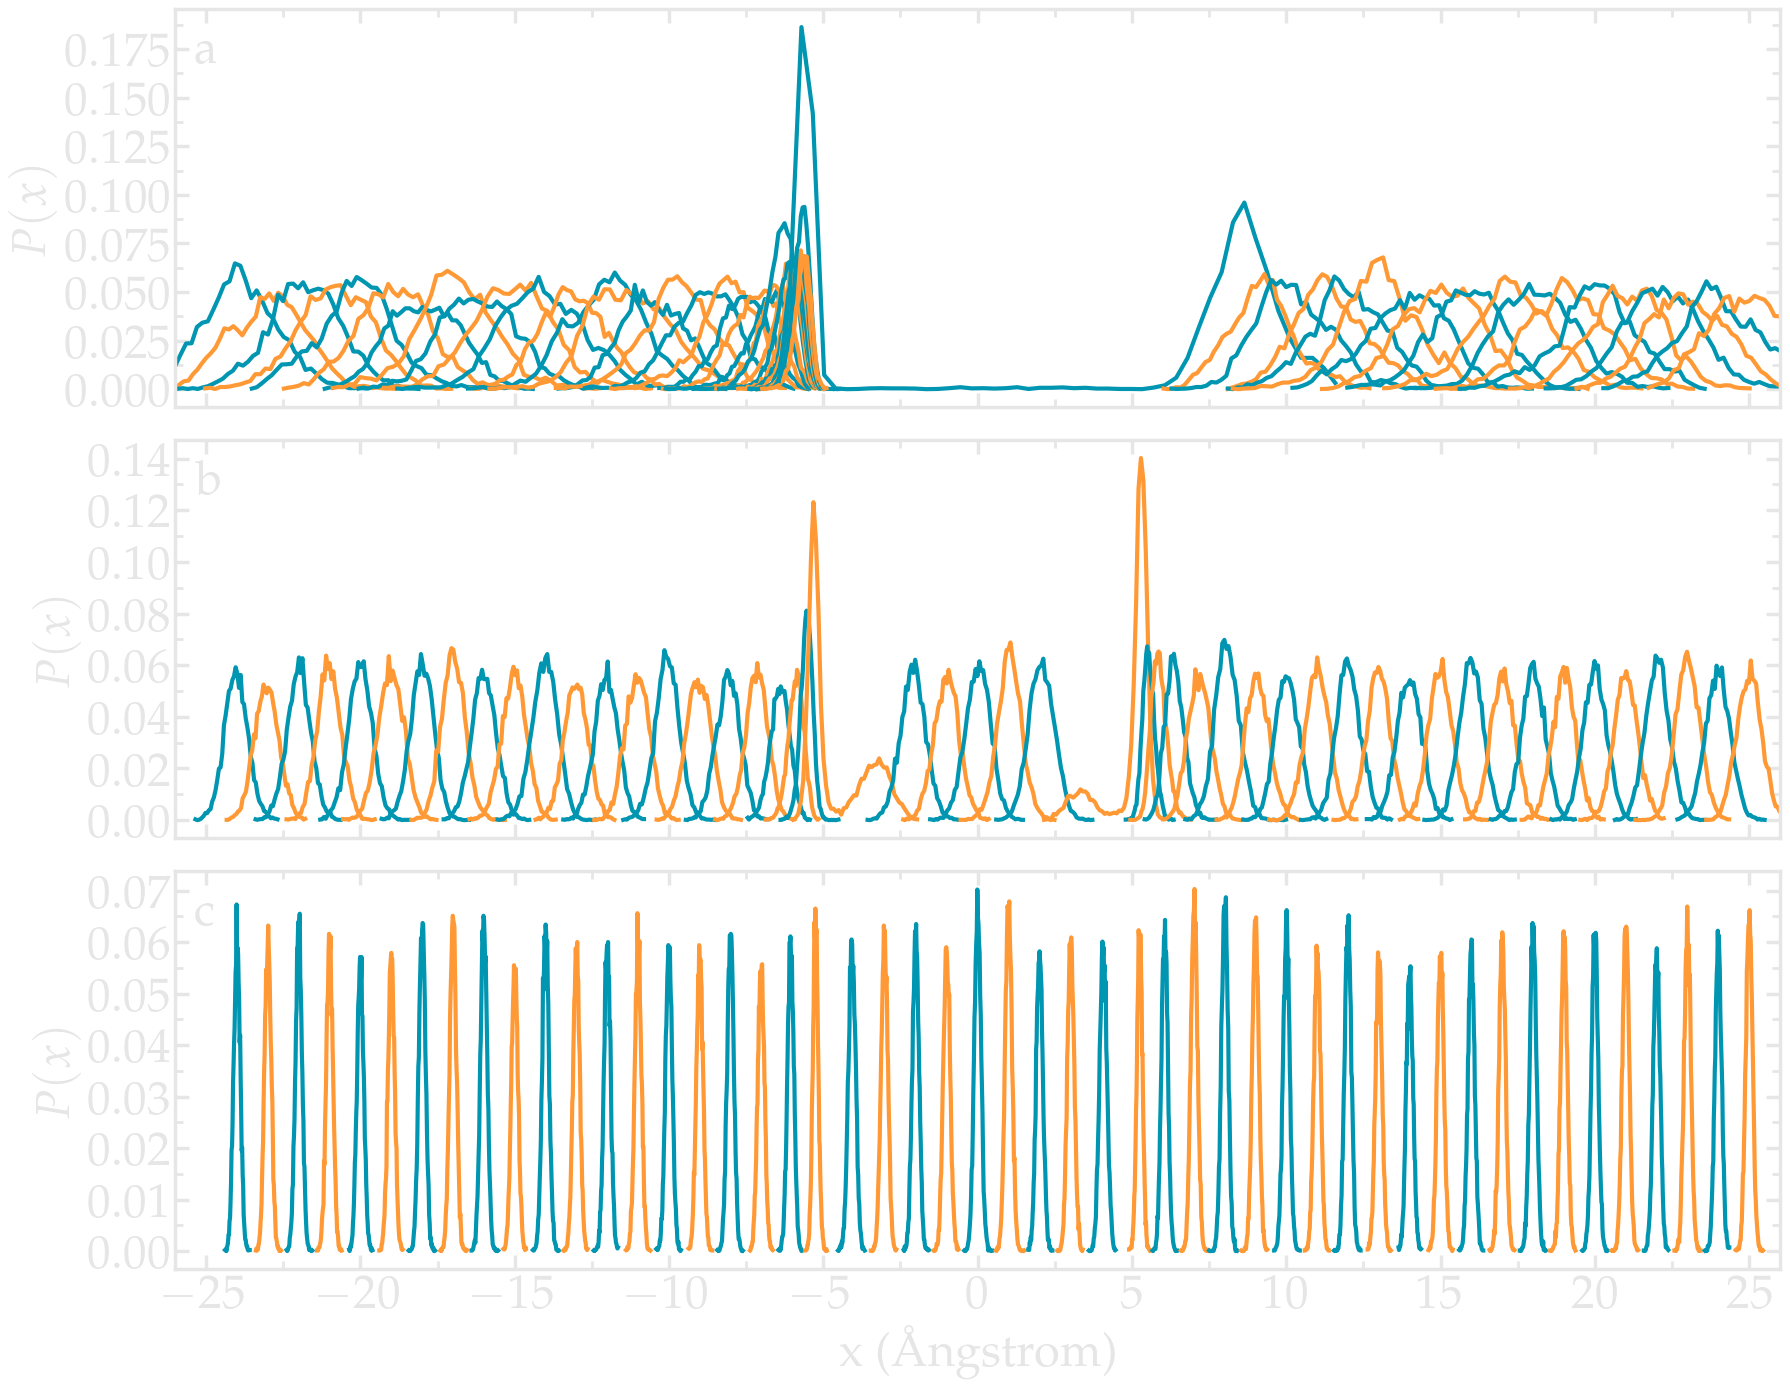

In [12]:
filename = "overlap"
for mode, mygray in zip(['light', 'dark'], [colors["lightgray"], colors["darkgray"]]):    
    fig = plt.figure(figsize=(18,14))
    ax, n, l_tot, c_tot = [], 0, 3, 1
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    for cpt, histogram in enumerate(histograms_k_15):
        if cpt % 2 == 0:
            ax[-1].plot(histogram[0], histogram[1], color=colors["myblue"], linewidth=3)
        else:
            ax[-1].plot(histogram[0], histogram[1], color=colors["myorange"], linewidth=3)
    complete_panel(ax[-1], None, r'$P (x)$', legend=False, axis_color=mygray)
    set_boundaries(plt, x_ticks=np.arange(-25, 30, 5), x_boundaries=(-26, 26))
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    for cpt, histogram in enumerate(histograms_k1_5):
        if cpt % 2 == 0:
            ax[-1].plot(histogram[0], histogram[1], color=colors["myblue"], linewidth=3)
        else:
            ax[-1].plot(histogram[0], histogram[1], color=colors["myorange"], linewidth=3)
    complete_panel(ax[-1], None, r'$P (x)$', legend=False, axis_color=mygray)
    set_boundaries(plt, x_ticks=np.arange(-25, 30, 5), x_boundaries=(-26, 26))
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    for cpt, histogram in enumerate(histograms_k15):
        if cpt % 2 == 0:
            ax[-1].plot(histogram[0], histogram[1], color=colors["myblue"], linewidth=3)
        else:
            ax[-1].plot(histogram[0], histogram[1], color=colors["myorange"], linewidth=3)
    complete_panel(ax[-1], r'x (Ångstrom)', r'$P (x)$', legend=False, axis_color=mygray)
    set_boundaries(plt, x_ticks=np.arange(-25, 30, 5), x_boundaries=(-26, 26))
    add_subplotlabels(fig, ax, ["a", "b", "c"], color=mygray)
    save_figure(fig, mode, git_path, path_figures, filename)